In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from matplotlib import pyplot as plt


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df = pd.read_csv("covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.00000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
19831,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,4/6/20,2,0,0
19832,Saint Pierre and Miquelon,France,46.88520,-56.315900,4/6/20,1,0,0
19833,NaN,South Sudan,6.87700,31.307000,4/6/20,1,0,0
19834,NaN,Western Sahara,24.21550,-12.885800,4/6/20,4,0,0


In [6]:
columns = [c.split('/')[0].lower() for c in df.columns]
df.columns = columns

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
#df = df.set_index('date')

print(df.head(), '\n\n', df.tail())

  province      country      lat     long       date  confirmed  deaths  \
0      NaN  Afghanistan  33.0000  65.0000 2020-01-22          0       0   
1      NaN      Albania  41.1533  20.1683 2020-01-22          0       0   
2      NaN      Algeria  28.0339   1.6596 2020-01-22          0       0   
3      NaN      Andorra  42.5063   1.5218 2020-01-22          0       0   
4      NaN       Angola -11.2027  17.8739 2020-01-22          0       0   

   recovered  
0          0  
1          0  
2          0  
3          0  
4          0   

                                 province                country       lat  \
19831  Falkland Islands (Islas Malvinas)         United Kingdom -51.79630   
19832          Saint Pierre and Miquelon                 France  46.88520   
19833                                NaN            South Sudan   6.87700   
19834                                NaN         Western Sahara  24.21550   
19835                                NaN  Sao Tome and Principe   0.186

In [7]:
last_date = max(df['date'])
print('last_date: ', last_date)

df_last = (
    df
    .loc[df['date']==last_date]
    .groupby('country')
    .agg({'confirmed': 'sum',
          'deaths': 'sum',
          'recovered': 'sum'})
    .rename(columns={'confirmed': 'sum_confirmed',
                     'deaths': 'sum_deaths',
                     'recovered': 'sum_recovered'})    
    .sort_values(by='sum_confirmed', ascending=False))

df_last['death_rate'] = df_last['sum_deaths'] / df_last['sum_confirmed']
df_last['recover_rate'] = df_last['sum_recovered'] / df_last['sum_confirmed']

last_date:  2020-04-06 00:00:00


In [8]:
# top 20 countries for confirmed infection

(df_last
 .query("sum_confirmed >= 10")
 .sort_values(by='sum_confirmed', ascending=False)
 .head(20))

,sum_confirmed,sum_deaths,sum_recovered,death_rate,recover_rate
country,,,,,
US,366614,10783,19581,0.029412,0.053410
Spain,136675,13341,40437,0.097611,0.295862
Italy,132547,16523,22837,0.124658,0.172294
Germany,103374,1810,28700,0.017509,0.277633
France,98963,8926,17428,0.090195,0.176106
China,82665,3335,77310,0.040344,0.935220
Iran,60500,3739,24236,0.061802,0.400595
United Kingdom,52279,5385,287,0.103005,0.005490
Turkey,30217,649,1326,0.021478,0.043883


In [9]:
# top 20 countries for death rate
# limited to countries which number of cumulative confirmed infection over 10

(df_last
 .query("sum_confirmed >= 10")
 .sort_values(by='death_rate', ascending=False)
 .head(20))

,sum_confirmed,sum_deaths,sum_recovered,death_rate,recover_rate
country,,,,,
Liberia,14,3,3,0.214286,0.214286
Bahamas,29,5,4,0.172414,0.137931
Sudan,12,2,2,0.166667,0.166667
Guyana,31,4,8,0.129032,0.258065
Angola,16,2,2,0.125000,0.125000
Italy,132547,16523,22837,0.124658,0.172294
Algeria,1423,173,90,0.121574,0.063247
San Marino,266,32,35,0.120301,0.131579
Congo (Kinshasa),161,18,5,0.111801,0.031056


In [21]:
# top 20 countries for recover rate
# limited to countries which number of cumulative confirmed infection over 10

(df_last
 .query("sum_confirmed >= 10")
 .sort_values(by='recover_rate', ascending=False)
 .head(30))

# 중국이? ㅈㄹ

,sum_confirmed,sum_deaths,sum_recovered,death_rate,recover_rate
country,,,,,
China,82665,3335,77310,0.040344,0.935220
Diamond Princess,712,11,619,0.015449,0.869382
Liechtenstein,77,1,55,0.012987,0.714286
Maldives,19,0,13,0.000000,0.684211
South Korea,10284,186,6598,0.018086,0.641579
Brunei,135,1,82,0.007407,0.607407
Bahrain,756,4,458,0.005291,0.605820
Cambodia,114,0,53,0.000000,0.464912
Senegal,226,2,92,0.008850,0.407080


# Daily Trends of Death Rate and Recover Rate

In [11]:
df['death_rate'] = df['deaths'] / df['confirmed']
df['recover_rate'] = df['recovered'] / df['confirmed']

In [12]:
# print country list to filter
sorted(df.country.unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 

In [13]:
# Iran is an important one but excluded because of first day's radical increasement
# It's a kind of outlier

country_list = ['China', 'Korea, South', 'Japan', 'US', 
                'France', 'Italy', 'Germany', 'UK', 'Spain', 'Vietnam', 'France', 'Switzerland', 'United Kingdom'
                #, 'Iran'
               ]

In [14]:
df_sdate_country = (
    df
    .query("confirmed > 0")
    .groupby('country')
    .agg({'date': 'min'})
    .rename(columns={'date': 'sdate'}))

df_sdate_country.sort_values(by='sdate')

# 1월22일자료부터 있어서 그런듯

,sdate
country,
China,2020-01-22
Japan,2020-01-22
South Korea,2020-01-22
Taiwan*,2020-01-22
US,2020-01-22
...,...
Sierra Leone,2020-03-31
Malawi,2020-04-02
South Sudan,2020-04-05


In [15]:
df_trend = (
    df
    .merge(df_sdate_country, on=['country'])
    .query("date >= sdate")
    .groupby(['country', 'date'])
    .agg({'confirmed': 'sum',
          'deaths': 'sum',
          'recovered': 'sum'})
    .reset_index())

df_trend['death_rate'] = df_trend['deaths'] / df_trend['confirmed']
df_trend['recover_rate'] = df_trend['recovered'] / df_trend['confirmed']

#print(df_trend.query("country == 'Vietnam'").head(20))
#print(df_trend.query("country == 'South Korea'").head(20))

In [16]:
df_trend['daycnt_from_start'] = df_trend.groupby('country')['date'].rank(method='first')

df_cum_confirmed = (
    df_trend
    .groupby('country')
    .agg({'confirmed':'max'})
    .rename(columns={'confirmed': 'confirmed_last'}))

df_trend = df_trend.merge(df_cum_confirmed, on='country')
df_trend['confirmed_pct_by_cum'] = df_trend['confirmed'] / df_trend['confirmed_last']

select_columns = ['country', 'date', 'daycnt_from_start', 'confirmed',
                  'death_rate', 'recover_rate', 'confirmed_pct_by_cum']
df_trend = df_trend.loc[:, select_columns]

df_trend.query("country == 'South Korea'")

,country,date,daycnt_from_start,confirmed,death_rate,recover_rate,confirmed_pct_by_cum
5137,South Korea,2020-01-22,1.0,1,0.000000,0.000000,0.000097
5138,South Korea,2020-01-23,2.0,1,0.000000,0.000000,0.000097
5139,South Korea,2020-01-24,3.0,2,0.000000,0.000000,0.000194
5140,South Korea,2020-01-25,4.0,2,0.000000,0.000000,0.000194
5141,South Korea,2020-01-26,5.0,3,0.000000,0.000000,0.000292
...,...,...,...,...,...,...,...
5208,South Korea,2020-04-02,72.0,9976,0.016941,0.584202,0.970051
5209,South Korea,2020-04-03,73.0,10062,0.017293,0.598390,0.978413
5210,South Korea,2020-04-04,74.0,10156,0.017428,0.622785,0.987553
5211,South Korea,2020-04-05,75.0,10237,0.017876,0.631337,0.995430


Text(0.5, 0.98, 'Daily Confirmed Infection Trends')

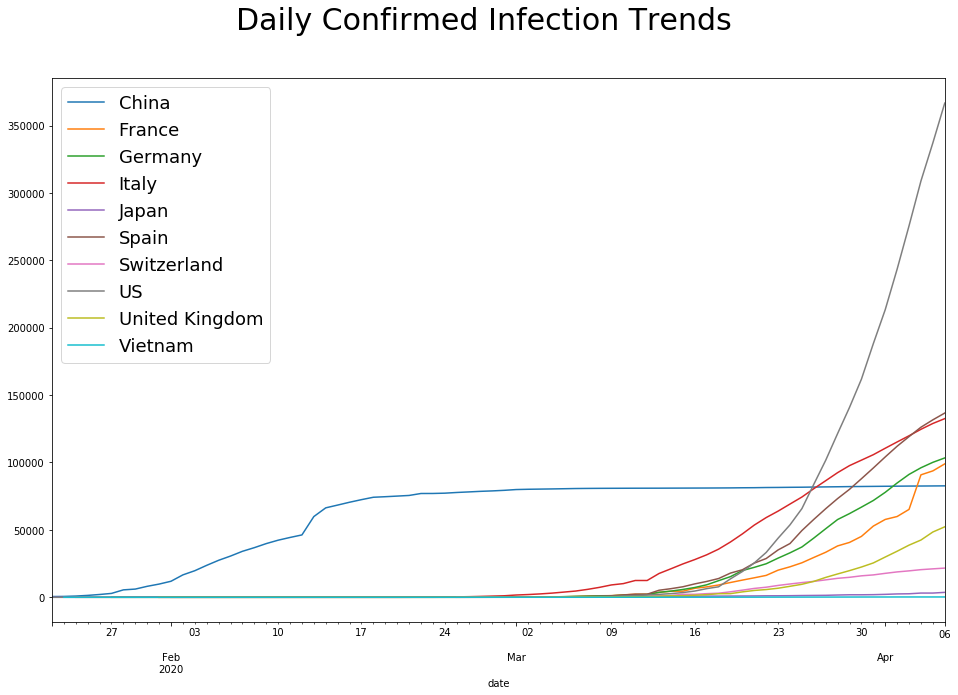

In [17]:
# Confirmed Infection Trends
# Since First Infection Day of Each Country

(df_trend
 .loc[df_trend['country'].isin(country_list)]
 .pivot(index='date', columns='country', values='confirmed')
 .plot(figsize=(16, 10))
 .legend(loc=2, prop={'size': 18}))

plt.suptitle('Daily Confirmed Infection Trends', fontsize=30)

Text(0.5, 0.98, 'Cumulative Confirmed Infection Trends')

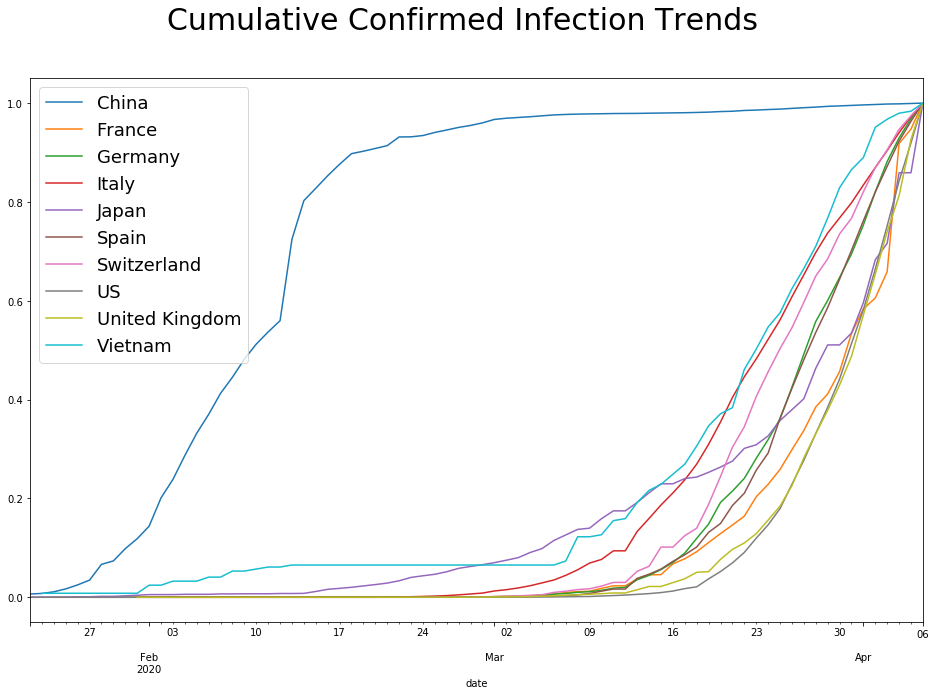

In [18]:
# Cumulative Confirmed Infection Trend

(df_trend
 .loc[df_trend['country'].isin(country_list)]
 .pivot(index='date', columns='country', values='confirmed_pct_by_cum')
 .plot(figsize=(16, 10))
 .legend(loc=2, prop={'size': 18}))

plt.suptitle('Cumulative Confirmed Infection Trends', fontsize=30)


Text(0.5, 0.98, 'Daily Death Rates Trends Since First Confirmed Infection Day')

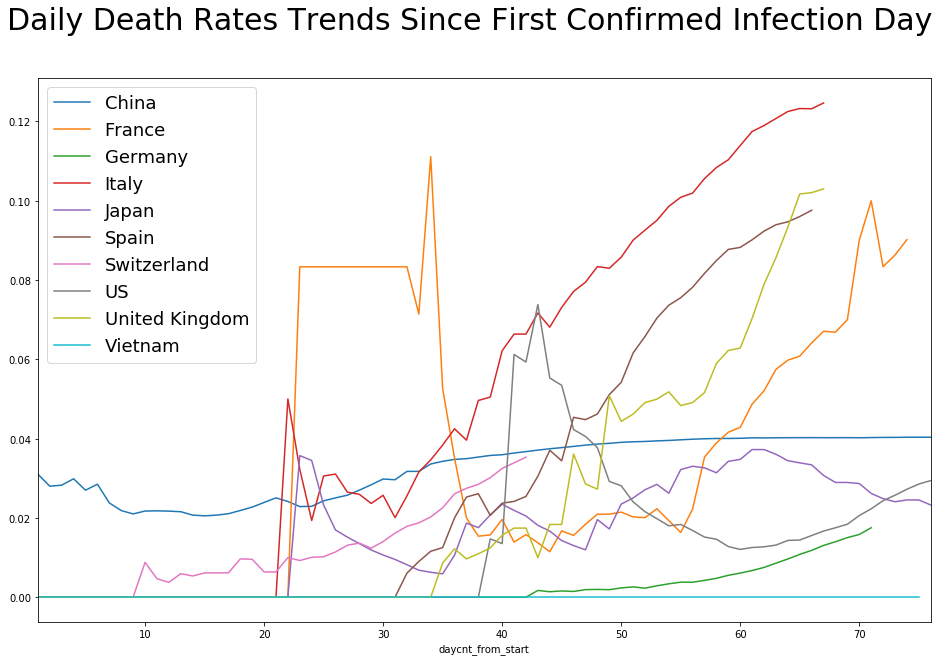

In [19]:
# Death Rate Trends
# Since First Infection Day of Each Country

(df_trend
 .loc[df_trend['country'].isin(country_list)]
 .pivot(index='daycnt_from_start', columns='country', values='death_rate')
 .plot(figsize=(16, 10))
 .legend(loc=2, prop={'size': 18}))

plt.suptitle('Daily Death Rates Trends Since First Confirmed Infection Day', fontsize=30)

Text(0.5, 0.98, 'Daily Recover Rate Trends Since First Confirmed Infection Day')

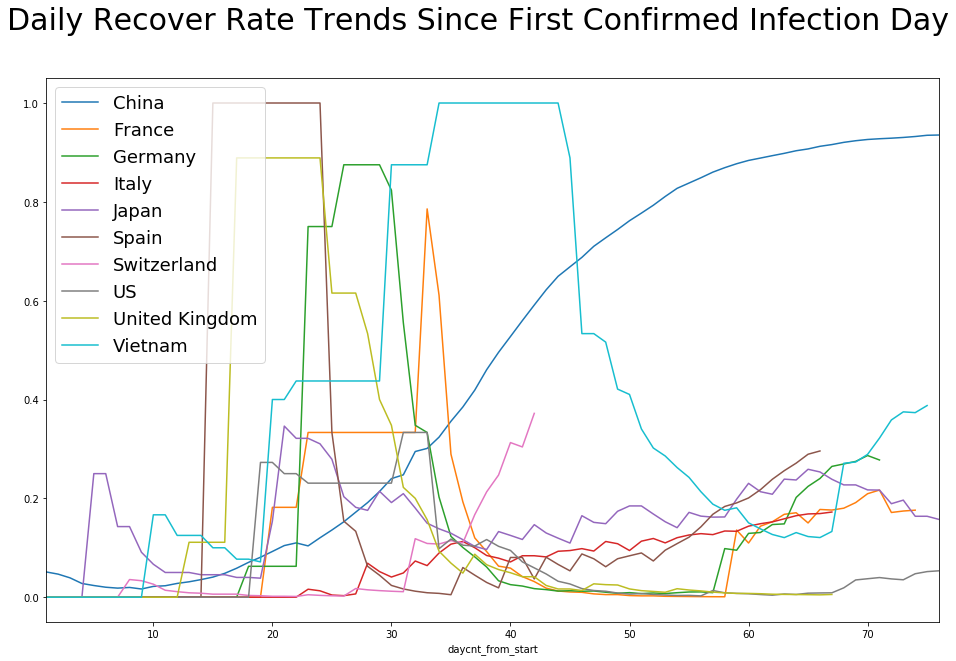

In [20]:
# Recover Rate Trends
# Since First Infection Day of Each Country

(df_trend
 .loc[df_trend['country'].isin(country_list)]
 .pivot(index='daycnt_from_start', columns='country', values='recover_rate')
 .plot(figsize=(16, 10))
 .legend(loc=2, prop={'size': 18}))

plt.suptitle('Daily Recover Rate Trends Since First Confirmed Infection Day', fontsize=30)